<h2 >Linear Regression using Gradient Descent</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Hypothesis</h2>
<h2> <blockquote style="font-family:Times New Roman;"><i>h<sub>&theta;</sub> (x) = &theta;<sub>0</sub> + &theta;<sub>1</sub>x</i></blockquote></h2>

In [2]:
def hypothesis(X,theta):
    y_ = theta[0] + (theta[1]*X)
    return y_

<h2 >Residual Error</h2>
<h2> <blockquote style="font-family:Times New Roman;"><i>e = 1/n &Sigma; (y<sub>p</sub> - y<sub>i</sub>)<sup>2</sup></i></blockquote></h2>

In [4]:
def error(X,y,theta):
    n = X.shape[0]
    y_ = hypothesis(X,theta)
    err = np.sum((y_ - y)**2)
    return err/n

<h2 >Gradient Descent</h2>
<h2> <blockquote style="font-family:Times New Roman;"><i>grad<sub>0</sub> = 2/n &Sigma; ( y<sub>p</sub> - y<sub>i</sub> )</i></blockquote>
<blockquote style="font-family:Times New Roman;"><i>grad<sub>1</sub> = 2/n &Sigma; ( y<sub>p</sub> - y<sub>i</sub> ) x<sub>i</sub></i></blockquote></h2>

In [5]:

def gradient(X,y,theta):
    n = X.shape[0]
    grad = np.zeros(2,)
    y_ = hypothesis(X,theta)
    grad[0] = np.sum(y_ - y)
    grad[1] = np.dot(X.T, y_ - y)
    return grad/n



In [6]:
def gradient_descent(X,y,learning_rate=0.1,epoch=200):
    n = X.shape[0]
    theta = np.zeros(2,)
    err_list =[]
    for i in range(epoch):
        err=error(X,y, theta)
        err_list.append(err)
        grad = gradient(X,y,theta)
        theta = theta - learning_rate * grad
    return err_list,theta
        

In [7]:
data = pd.read_csv("https://raw.githubusercontent.com/mrgautambhagat/datasets/main/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
X = data['YearsExperience']
y = data['Salary']
X = np.array(X)
y = np.array(y)

In [9]:
u = X.mean()
std = X.std()
X = (X-u)/std

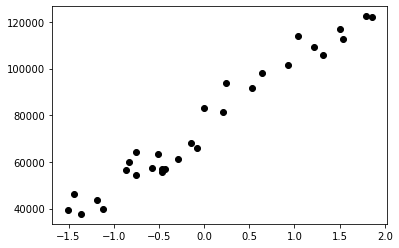

In [10]:
plt.scatter(X,y,c="black")
plt.show()

In [11]:
err_list , theta = gradient_descent(X,y,learning_rate=0.1,epoch=100)

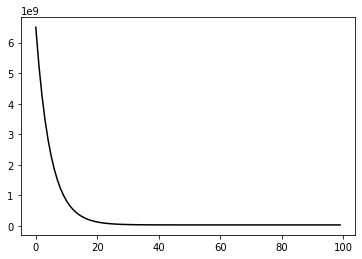

In [12]:
plt.plot(err_list,c="black")
plt.show()

In [13]:
y_ = hypothesis(X,theta)

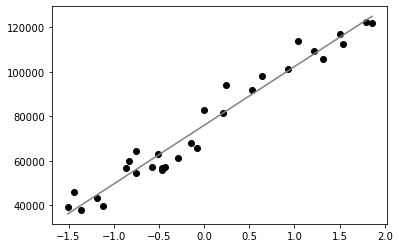

In [14]:
plt.scatter(X,y,c="black")
plt.plot(X,y_,c="grey")
plt.show()

In [15]:
x = float(input("Enter years of experience : "))
x = (x-u)/std
y_pred = hypothesis(x,theta)

Enter years of experience : 5


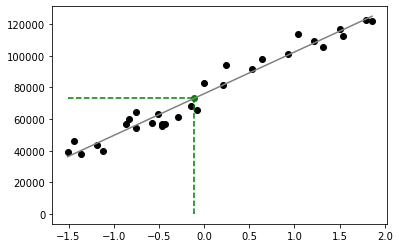

In [17]:
xmin_ =X.min()

plt.scatter(X,y,c="black")
plt.plot(X,y_,c="grey")
plt.scatter(x,y_pred,c="green")
plt.hlines(y = y_pred, xmin = xmin_ ,xmax = x,color="g",linestyle="dashed")
plt.vlines(x = x, ymin = x ,ymax = y_pred,color="g",linestyle="dashed")
plt.show()

In [18]:
y_ = hypothesis(X,theta)

In [19]:
from sklearn.metrics import r2_score
r2_score(y,y_)

0.956956657858816

### Accuracy rate = 0.956956657858816